In [ ]:
# Report 
#Task 1.1 : Nothing New
#Task 1.2 : Splitted the channels using cv2.split and apply CLAHE on each channel, then gather them again
#Task 2.1 : Convert the image from RGB to HSV, and extract the L channel
#Task 2.2 : Histogram Equalization was applied to the extracted L channel, then the enhanced L channel replaced the original L channel
#Task 3 Part1: Applied Sharpen to the image using my sharpen function from my project code
#Task 3 Part2: Gaussian Blur was applied to the image using cv2.GaussianBlur() with a kernel size of (15,15) 


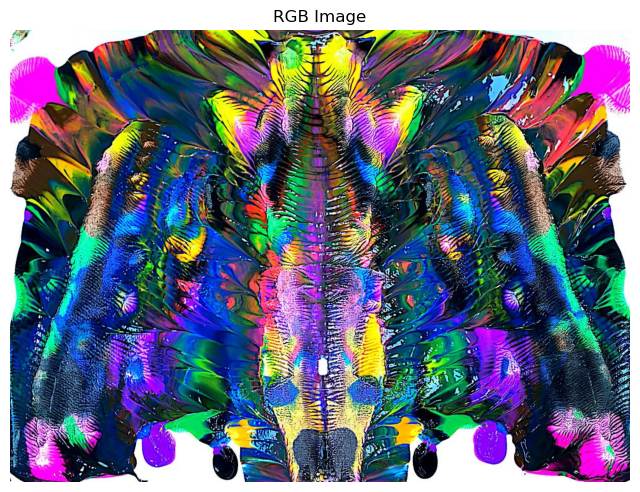

In [69]:
#Task 1.1
from skimage import io, color , exposure
import matplotlib.pyplot as plt
import cv2
import numpy as np


image_path = r"C:\Users\Abdul\Downloads\Colored_Image.jpg"  
image = io.imread(image_path)


plt.figure(figsize=(8, 6))
plt.imshow(image)  
plt.title("RGB Image")
plt.axis('off')
plt.show()


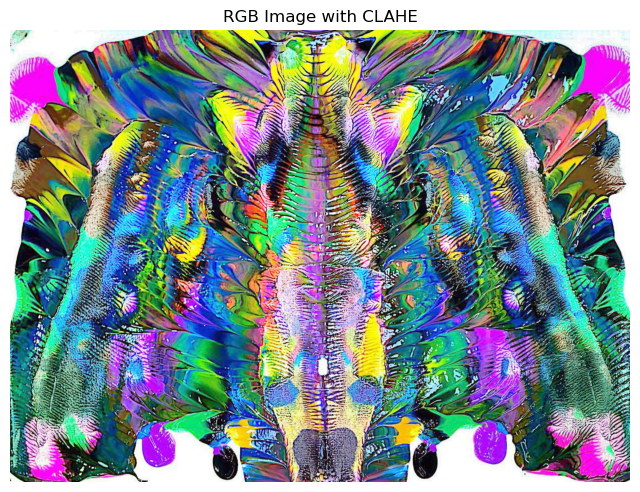

In [70]:
#Task 1.2
def apply_clahe(image):
    channels = cv2.split(image)
    clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(4, 4))
    enhanced_channels = [clahe.apply(channel) for channel in channels]
    return cv2.merge(enhanced_channels)

bgr_image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

enhanced_bgr_image = apply_clahe(bgr_image)

enhanced_rgb_image = cv2.cvtColor(enhanced_bgr_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 6))
plt.imshow(enhanced_rgb_image)
plt.title("RGB Image with CLAHE")
plt.axis('off')
plt.show()

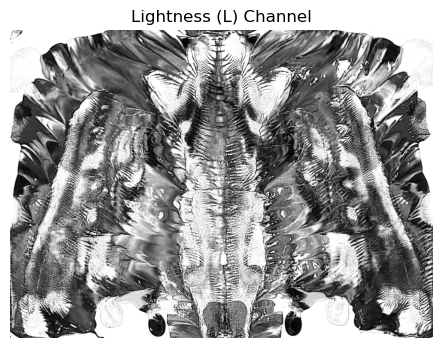

In [71]:
#Task 2.1
hsv_image = color.rgb2hsv(image)

lightness_channel = hsv_image[:, :, 2]


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(lightness_channel, cmap='gray')
plt.title("Lightness (L) Channel")
plt.axis('off')

plt.show()


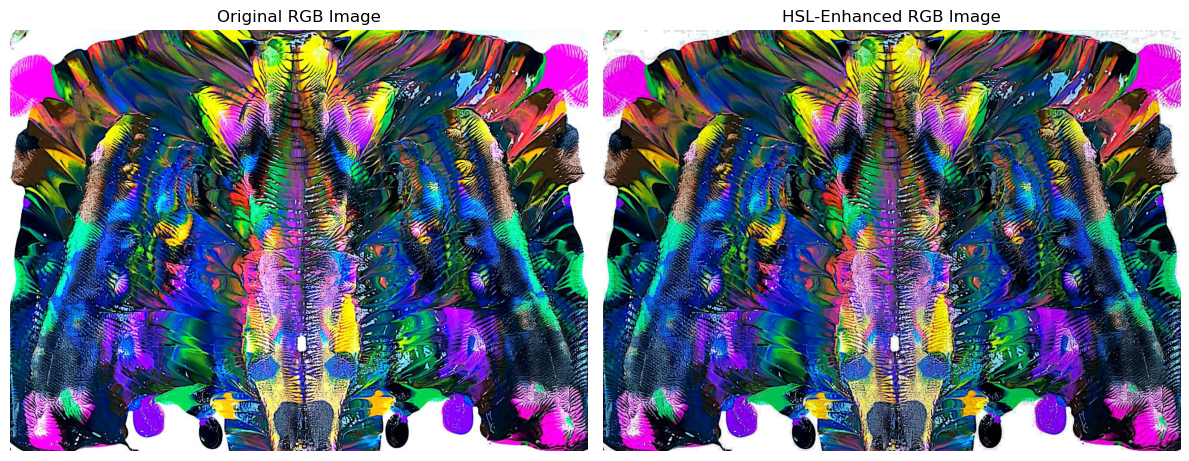

In [73]:
# Step 2.2:

enhanced_lightness = exposure.equalize_hist(lightness_channel)

hsv_image[:, :, 2] = enhanced_lightness

enhanced_hsl_image = color.hsv2rgb(hsv_image)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original RGB Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(enhanced_hsl_image)
plt.title("HSL-Enhanced RGB Image")
plt.axis('off')

plt.tight_layout()
plt.show()

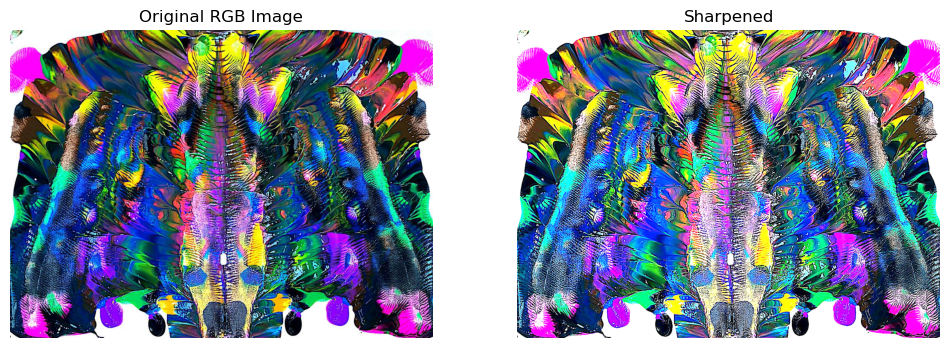

In [74]:
#Task 3
def sharpen_image(image):
    kernel = np.array(
        [[0, -1, 0],
         [-1, 5.5, -1],
         [0, -1, 0]]
    )
    return cv2.filter2D(image, -1, kernel)

sharpened = sharpen_image(image)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original RGB Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sharpened)
plt.title("Sharpened")
plt.axis('off')

plt.show()

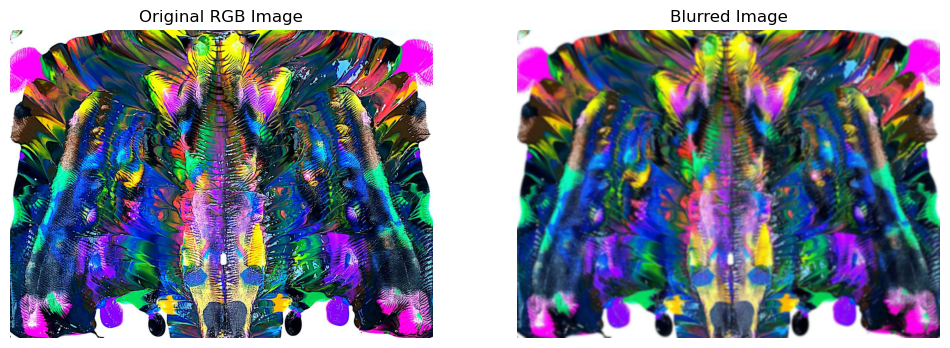

In [75]:
#Task 3
def blur_image(image, kernel_size=(15, 15)):
    return cv2.GaussianBlur(image, kernel_size, sigmaX=0)

blurred = blur_image(image)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original RGB Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(blurred)
plt.title("Blurred Image")
plt.axis('off')

plt.show()
